# Four dimensions for EDA

1. Compostition
2. Distribution
3. Comparison
4. Relationship

In [20]:
# importing libraries
import pandas as pd

In [21]:
%pwd

'd:\\Python\\MLProjectsPW\\python_ka_chilla\\05_pandas'

In [22]:
# load the data
df = pd.read_csv("../00_datasets/titanic.csv")
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# Composition

In [23]:
# print the number of rows and columns using f-string
print(f"No. of Rows: {df.shape[0]}\nNo. of Columns: {df.shape[1]}")

No. of Rows: 891
No. of Columns: 15


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [25]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [26]:
print(df.head())
df["sex"].value_counts()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


sex
male      577
female    314
Name: count, dtype: int64

In [27]:
# total number of rows
len(df)

891

In [28]:
# find value counts percentage for sex column
df["sex"].value_counts(normalize=True)*100 # /len(df)*100
# round the percentage to 2 decimal places
round(df["sex"].value_counts(normalize=True)*100, 2)

sex
male      64.76
female    35.24
Name: proportion, dtype: float64

In [29]:
# class column value counts
class_counts = round(df["class"].value_counts(normalize=True)*100, 2)
# sord the value counts in descending order
class_counts.sort_values(ascending=False)

class
Third     55.11
First     24.24
Second    20.65
Name: proportion, dtype: float64

In [30]:
# find the value counts in percentage for class where sex == female
round(df[df["sex"] == "female"]["class"].value_counts()/len(df)*100,2).sort_values(ascending=False)   

class
Third     16.16
First     10.55
Second     8.53
Name: count, dtype: float64

In [31]:
# group by class and find the percentage of each class for sex column
round(df.groupby(["sex","class"]).size()/len(df)*100,2).sort_values(ascending=False)

sex     class 
male    Third     38.95
female  Third     16.16
male    First     13.69
        Second    12.12
female  First     10.55
        Second     8.53
dtype: float64

In [32]:
round(df.groupby(["sex", "class", "embarked", "fare"]).size()/len(df)*100,2).sort_values(ascending=False)

sex     class   embarked  fare   
male    Third   S         8.0500     4.60
                          7.8958     3.59
        Second  S         13.0000    3.14
        Third   Q         7.7500     1.91
        Second  S         10.5000    1.80
                                     ... 
female  First   C         76.2917    0.11
                          76.7292    0.11
                          79.2000    0.11
                          82.1708    0.11
male    Third   S         20.2125    0.11
Length: 370, dtype: float64

In [33]:
df.sex.describe()

count      891
unique       2
top       male
freq       577
Name: sex, dtype: object

# Distribution

In [34]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [35]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: ylabel='Frequency'>

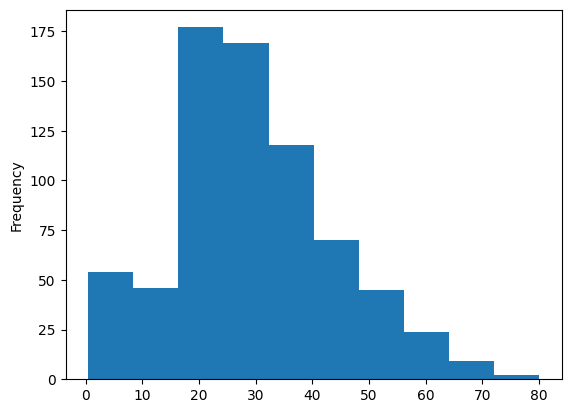

In [38]:
df["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

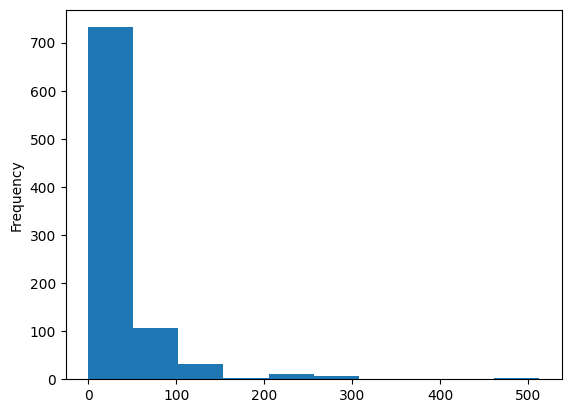

In [39]:
df["fare"].plot(kind="hist")

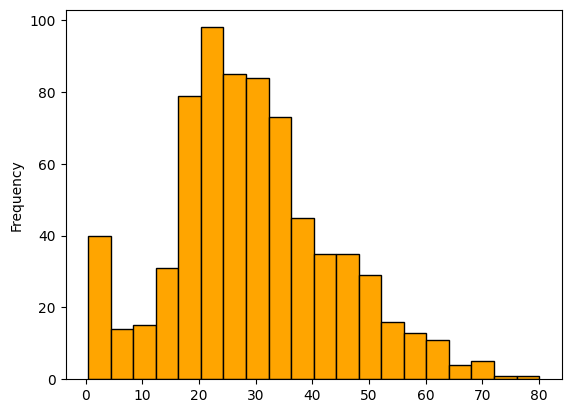

In [42]:
# age distribution
age_distribution = df["age"].plot(kind="hist", bins=20, color="orange", edgecolor="black")

In [ ]:
df["age"].skew()

np.float64(0.38910778230082704)

In [45]:
df["fare"].skew() # right skew

np.float64(4.787316519674893)

# Comparison

In [50]:
df.survived.mean()

np.float64(0.3838383838383838)

In [52]:
df.groupby(["sex","who","class"])["survived"].mean() # survival rate by gender

sex     who    class 
female  child  First     0.666667
               Second    1.000000
               Third     0.533333
        woman  First     0.978022
               Second    0.909091
               Third     0.491228
male    child  First     1.000000
               Second    1.000000
               Third     0.321429
        man    First     0.352941
               Second    0.080808
               Third     0.119122
Name: survived, dtype: float64

<Axes: title={'center': 'Surviaval Rate plot'}, xlabel='who'>

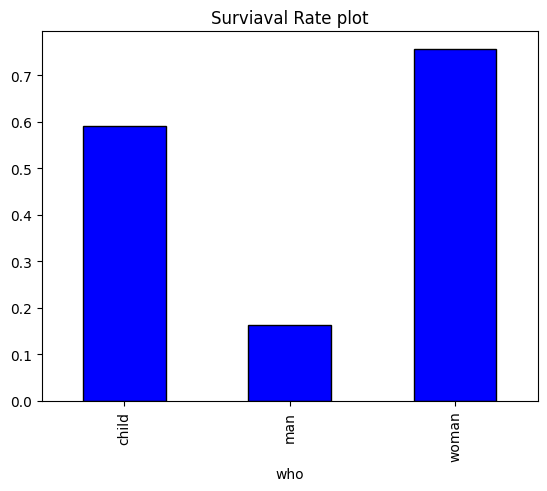

In [58]:
df.groupby(["who"])["survived"].mean().plot(kind="bar", color="blue", edgecolor="black", title="Surviaval Rate plot")

 # Relationship

In [66]:
# Create a correlation matrix only on int and float data from df
df[["age", "fare"]].corr()

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000


In [64]:
df.groupby('survived')[["age", "fare"]].mean()

,age,fare
survived,,
0,30.626179,22.117887
1,28.343690,48.395408
